In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

In [4]:
df=pd.read_csv("../Data/Mall_Customers.csv",index_col="CustomerID")

In [5]:
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [10]:
df.isna().sum()

Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [8]:
le=LabelEncoder()
df["Genre"]=le.fit_transform(df["Genre"])

In [9]:
df.head()

,Genre,Age,Annual_Income_(k$),Spending_Score
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40


In [11]:
X=df

### Elbow Method

##### Inertia: It is the sum of squared distances of samples to their closest cluster center.
We iterate the values of k from 1 to 10 using for loop and calculated the values of inertia for each value of k.

In [19]:
k=[1,2,3,4,5,6,7,8,9,10]
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(X)
    ssd.append(model.inertia_ )

Text(0, 0.5, 'Inertia(Sum of Squared Distances)')

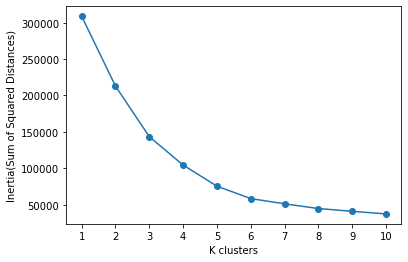

In [27]:
plt.plot(k,ssd,marker='o')
plt.xticks(k)
plt.xlabel("K clusters")
plt.ylabel("Inertia(Sum of Squared Distances)")

To get the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 5.

In [28]:
model=KMeans(n_clusters=5)
model.fit(X)

KMeans(n_clusters=5)

In [29]:
model.labels_

array([0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3,
       0, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 2, 4, 1, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 1, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4,
       2, 4])

In [30]:
model.cluster_centers_

array([[ 0.39130435, 45.2173913 , 26.30434783, 20.91304348],
       [ 0.41772152, 43.08860759, 55.29113924, 49.56962025],
       [ 0.52777778, 40.66666667, 87.75      , 17.58333333],
       [ 0.39130435, 25.52173913, 26.30434783, 78.56521739],
       [ 0.46153846, 32.69230769, 86.53846154, 82.12820513]])

In [31]:
model.n_iter_

4

In [32]:
data=df
data["Customer Group"]=model.labels_

In [33]:
data

,Genre,Age,Annual_Income_(k$),Spending_Score,Customer Group
CustomerID,,,,,
1,1,19,15,39,0
2,1,21,15,81,3
3,0,20,16,6,0
4,0,23,16,77,3
5,0,31,17,40,0
...,...,...,...,...,...
196,0,35,120,79,4
197,0,45,126,28,2
198,1,32,126,74,4


In [35]:
df.columns

Index(['Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score',
       'Customer Group'],
      dtype='object')

### Selecting only two features for model for visualization of Clusters
Annual_Income_(k$) and Spending_Score are two important Features

In [36]:
X=df[[ 'Annual_Income_(k$)', 'Spending_Score',]]

In [37]:
X

,Annual_Income_(k$),Spending_Score
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


### Elbow method to get optimal number of k on new data

In [68]:
k=[1,2,3,4,5,6,7,8,9,10]
ssd=[]
for i in k:
    model=KMeans(n_clusters=i)
    model.fit(X)
    ssd.append(model.inertia_ )

Text(0, 0.5, 'Inertia(Sum of Squared Distances)')

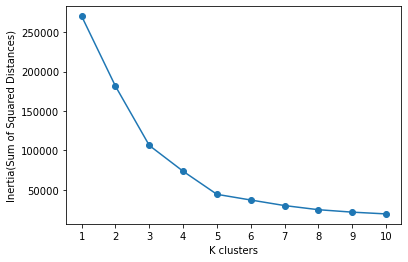

In [69]:
plt.plot(k,ssd,marker='o')
plt.xticks(k)
plt.xlabel("K clusters")
plt.ylabel("Inertia(Sum of Squared Distances)")

To get the optimal number of clusters, we have to select the value of k at the “elbow” ie the point after which the inertia start decreasing in a linear fashion. Thus for the given data, we conclude that the optimal number of clusters for the data is 5.

In [64]:
model=KMeans(n_clusters=5)
model.fit(X)

KMeans(n_clusters=5)

In [65]:
group_labels=model.labels_
centeroid=model.cluster_centers_
centeroid

array([[55.2962963 , 49.51851852],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513]])

### Cluster Visualization

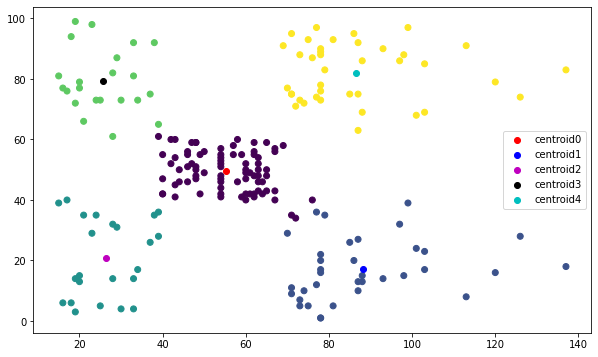

In [66]:
#plotting the clusters
fig=plt.figure(figsize=(10,6))
plt.scatter(df['Annual_Income_(k$)'],df['Spending_Score'],c=group_labels)
color=["r","b","m","k","c","y"]
for i in range(centeroid.shape[0]):
    plt.scatter(centeroid[i][0],centeroid[i][1],color=color[i], label=str("centroid"+str(i)))
plt.legend()